# Working with `auxi`'s Heat Transfer `naturalconvection.IsothermalFlatSurface` Models

## Purpose
The purpose of this example is to introduce and demonstrate the `IsothermalFlatSurface` class in `auxi`'s `naturalconvection` module.

## Background
It is often needed to calculate heat exchnage between surfaces and fluids due to natural convection. These calculations require the determination of a heat transfer coefficient. The coefficients are based on empirical correlations determined from experimental measurements. To save on the time required to locate the appropriate correlations from literature, `auxi`'s `naturalconvection` module provides models to make doing these calculations faster, easier, and more reliable.

## Items Covered
The following items in `auxi` are discussed and demonstrated in this example:
* `auxi.tools.transportphenomena.heattransfer.naturalconvection.IsothermalFlatSurface`

## Example Scope
In this example we address the following aspects:
1. Introduction to `IsothermalFlatSurface` regions mapping diagram.
1. Calculating local and average Nusselt numbers.
1. Calculating local and average heat transfer coefficients.
1. Calculating local and average rates of heat exchange.

## Demonstrations

### Introduction to `IsothermalFlatSurface` Regions
The different correlations used in the `IsothermalFlatSurface` model apply to specific regions in the 2D Ra-theta coordinate system. To gain some insight into which regions are covered with proven correlations (grey), and which are covered by interpolation or extrapolation (red), these regions can be plotted as follows.

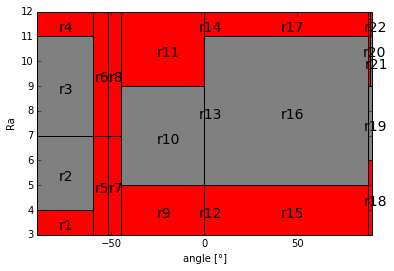

In [2]:
# import matplotlib so that we can use it for plotting
from matplotlib import pyplot as plt
%matplotlib inline

# import the model class
from auxi.tools.transportphenomena.heattransfer.naturalconvection import IsothermalFlatSurface

# import the material air so that we can use it as the fluid
from auxi.tools.materialphysicalproperties.gases import air

# create the model object
model = IsothermalFlatSurface(air, True, None)

# plot the regions covered by the correlations
model.plot_regions()

### Doing Convection Heat Transfer Calculations
Now we can use the model and the fluid material to estimate the heat transferred from a flat surface.

In [3]:
# create an instance of the model, with air as fluid
model = IsothermalFlatSurface(air)

# define the heat transfer conditions
L = 0.4  # [m] length of heat transfer surface
w = 0.5  # [m] width of heat transfer surface
A = L*w  # [m2] area of heat transfer surface
θ = 0.0  # [°] angle of heat transfer surface with vertical
         # positive values for the upper surface
         # negative values for the lower surface
Ts = 313.0  # [K] surface temperature
Tf = 283.0  # [K] fluid temperature

# calculate the heat transfer coefficient parameters
Nu_x = model.Nu_x(L, θ, Ts, T=Tf)  # local Nusselt number
Nu_L = model.Nu_L(L, θ, Ts, T=Tf)  # average Nusselt number
h_x = model.h_x(L, θ, Ts, T=Tf)  # [W/m2/K] local heat transfer coefficient
h_L = model.h_L(L, θ, Ts, T=Tf)  # [W/m2/K] average heat transfer coefficient
q_x = h_x * A * (Ts - Tf)  # [W/m2]
q_L = h_L * A * (Ts - Tf)  # [W/m2]

# print the results
print('Nu_x', Nu_x)
print('Nu_L', Nu_L)
print('h_x', h_x, "W/m2/K")
print('h_L', h_L, "W/m2/K")
print('q_x', q_x, "W")
print('q_L', q_L, "W")

Nu_x 64.1972833727
Nu_L 85.5963778303
h_x 4.21863186596 W/m2/K
h_L 5.62484248795 W/m2/K
q_x 25.3117911958 W
q_L 33.7490549277 W
